<a href="https://colab.research.google.com/github/ArthurVarteressians/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# number of subprocesses to use for data loading
num_workers = 0                                            

# how many samples per batch to load
batch_size = 15                                         

# convert data to torch.FloatTensor
transform = transforms.ToTensor()                           

In [3]:
# choose the training datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
# choose the test datasets
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)   

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
# prepare data loaders                                                                     
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [5]:
len(train_data)
#train_data.train_lables

60000

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
test_loader.dataset.data.shape

torch.Size([10000, 28, 28])

tensor(2)



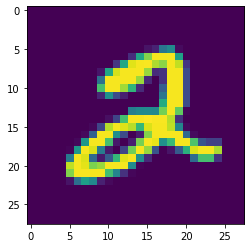

In [10]:
i = 5
print(train_loader.dataset.targets[i])
plt.imshow(train_loader.dataset.data[i])                                        #If we want a specific color we use: , cmap = "gray")    

In [11]:
np.where(train_loader.dataset.targets==5)[0]                                    #Or we can use print()

array([    0,    11,    35, ..., 59968, 59993, 59997])

In [12]:
(np.where(train_loader.dataset.targets==5)[0]).shape

(5421,)

In [13]:
#train_loader.dataset.data[1:3:2].shape                                         #Choose 2 targets in index
#train_loader.dataset.data                                                      #Get our data Matrix

In [14]:
for i in range(10):
  print("number: " + str(i) + " index:" + str(np.where(train_loader.dataset.targets==i)[0][0]))

number: 0 index:1
number: 1 index:3
number: 2 index:5
number: 3 index:7
number: 4 index:2
number: 5 index:0
number: 6 index:13
number: 7 index:15
number: 8 index:17
number: 9 index:4


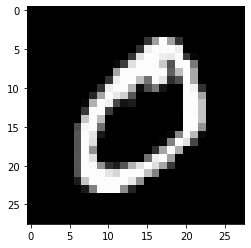

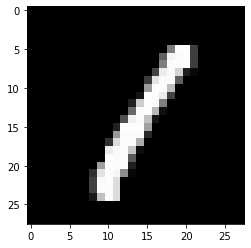

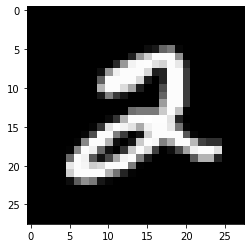

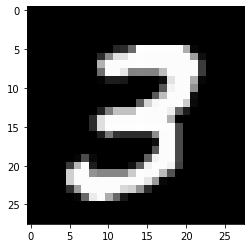

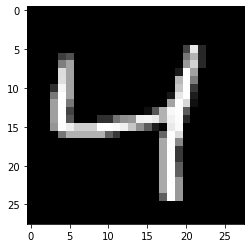

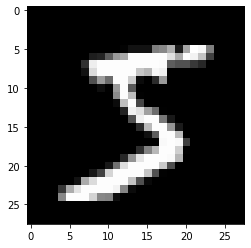

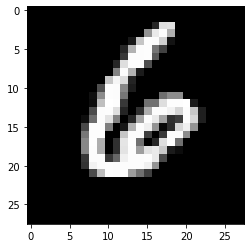

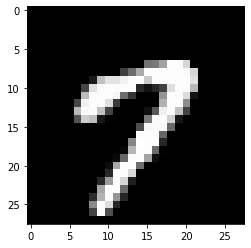

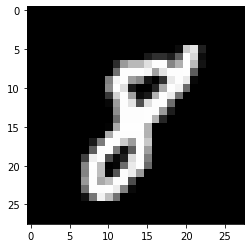

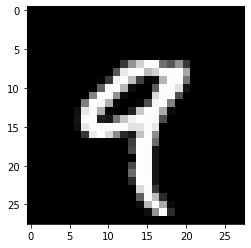

In [15]:
for i in range(10):
  ind = np.where(train_loader.dataset.targets==i)[0][0]
  plt.imshow(train_loader.dataset.data[ind], cmap = "gray")
  plt.show()

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 512, bias=True) 
        self.lin2 = nn.Linear(512, 256, bias=True)
        self.lin3 = nn.Linear(256, 10, bias=True)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (lin1): Linear(in_features=784, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=256, bias=True)
  (lin3): Linear(in_features=256, out_features=10, bias=True)
)


In [17]:
model = nn.Sequential(
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256,10),
        nn.LogSoftmax()
        )

In [18]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=256, out_features=10, bias=True)
  (7): LogSoftmax(dim=None)
)


In [19]:
import torch.optim as optim

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [21]:
num_epoch = 5
for epoch in range(num_epoch):                                                  #loop over the dataset multiple times
    print(epoch)
    train_loss = 0.0
    test_loss = 0.0

    for (x0, y0) in train_loader:
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs_train = model(x0.reshape(-1, 28*28).float())
        loss_train = criterion(outputs_train, y0)
        loss_train.backward()
        optimizer.step()

        # print statistics
        train_loss += loss_train.item()


    with torch.no_grad():
        for (x1, y1) in test_loader:
            outputs_test = model(x1.reshape(-1, 28*28).float())
            loss_test = criterion(outputs_test, y1)
            test_loss += loss_test.item()


    print([train_loss, test_loss])

print('Finished Training')

0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[3069.328769298736, 228.32986478414387]
1
[1207.0279282338452, 163.417134844698]
2
[894.4476880670991, 128.2997379299486]
3
[713.2295469618984, 107.64990388439037]
4
[594.0287061234703, 94.76336964982329]
Finished Training
